In [1]:
import pandas as pd
import numpy as np
# coding=utf-8
df_price = pd.read_csv(r'data/二手房房价.csv', encoding='utf-8', parse_dates=['Date'])
# 进行初始数据缺失值分析
df_price.isnull().sum()
# 输出结果显示没有缺失值

FileNotFoundError: [Errno 2] No such file or directory: 'data/二手房房价.csv'

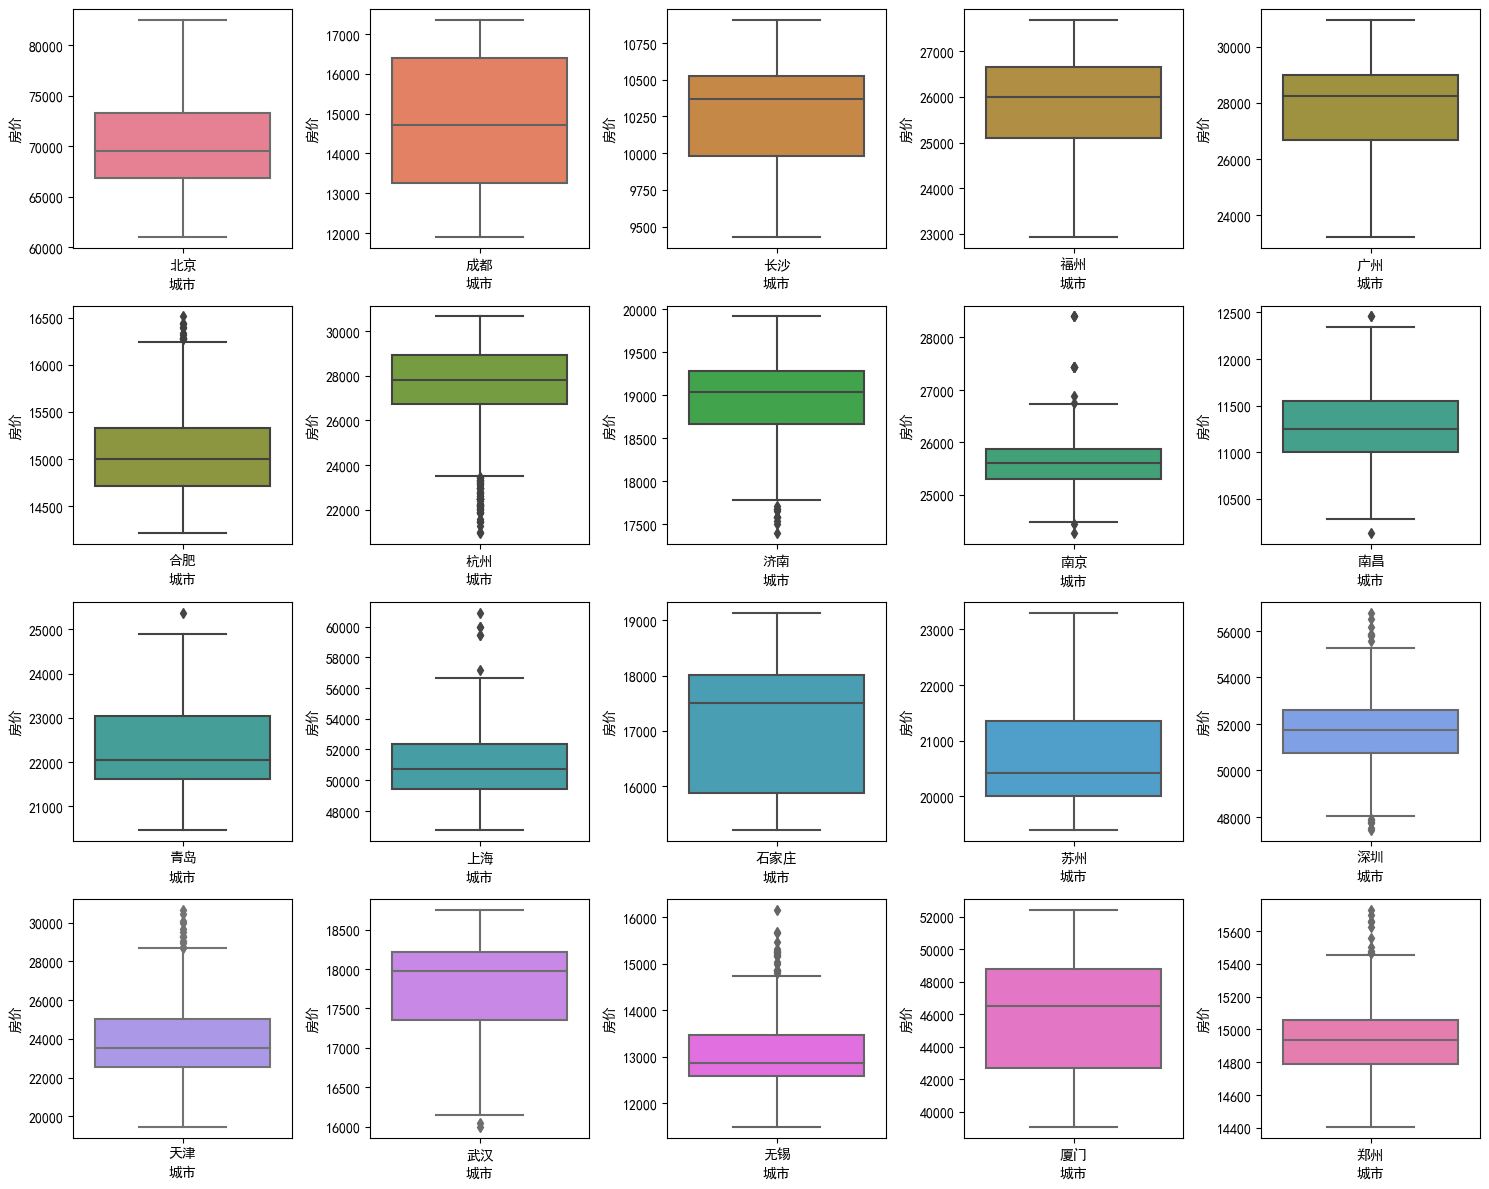

In [41]:
# 初始数据异常值分析
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# 数据预处理
df_price = pd.read_csv(r'data/二手房房价.csv', encoding='utf-8', parse_dates=['Date'])
df_box = df_price.iloc[:, 1:21]
# 通过pd.melt函数进行数据框的重组，
df_box = pd.melt(df_box, var_name='城市', value_name='房价')
cities = list(df_box['城市'].unique())

# 自定义每一组箱线图的颜色
custom_palette = sns.color_palette("husl", n_colors=20)

# 设置子图布局为四行五列
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))
# 此时axes是一个（4，5）的二维数组
plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换sans-serif字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负数的负号显示问题

# 在每个子图中绘制箱线图
for i, ax in enumerate(axes.flatten()):
    # 此处i时序号，从0开始到19
    if i < 20:  # 防止多余的子图
        group_data = df_box[df_box['城市'] == cities[i]]
        sns.boxplot(x='城市', y='房价', data=group_data, palette=[custom_palette[i]], ax=ax)
        # ax.set_title(f'{cities[i]}房价')
        

# 调整子图布局
plt.tight_layout()
plt.show()


In [54]:
# 将每组中的异常值数据替换为空值，并统计空值个数
df_price = pd.read_csv(r'data/二手房房价.csv', encoding='utf-8', parse_dates=['Date'])
cities = list(df_price.columns)[1:21]
for city in cities:
    Q1 = df_price[city].quantile(0.25)
    Q3 = df_price[city].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df_price[city] = df_price[city].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

df_miss = df_price.isna().sum().reset_index().rename(columns={0: '缺失值'})
# 计算缺失值比例
df_miss['缺失比例'] = df_miss['缺失值']/df_price.shape[0]
df_miss.sort_values(by='缺失比例', ascending=False, inplace=True)
df_miss


,index,缺失值,缺失比例
7,杭州,52,0.160000
18,无锡,17,0.052308
15,深圳,13,0.040000
9,南京,12,0.036923
16,天津,12,0.036923
6,合肥,11,0.033846
20,郑州,10,0.030769
8,济南,10,0.030769
12,上海,6,0.018462
10,南昌,3,0.009231


Text(122.72222222222221, 0.5, '日期')

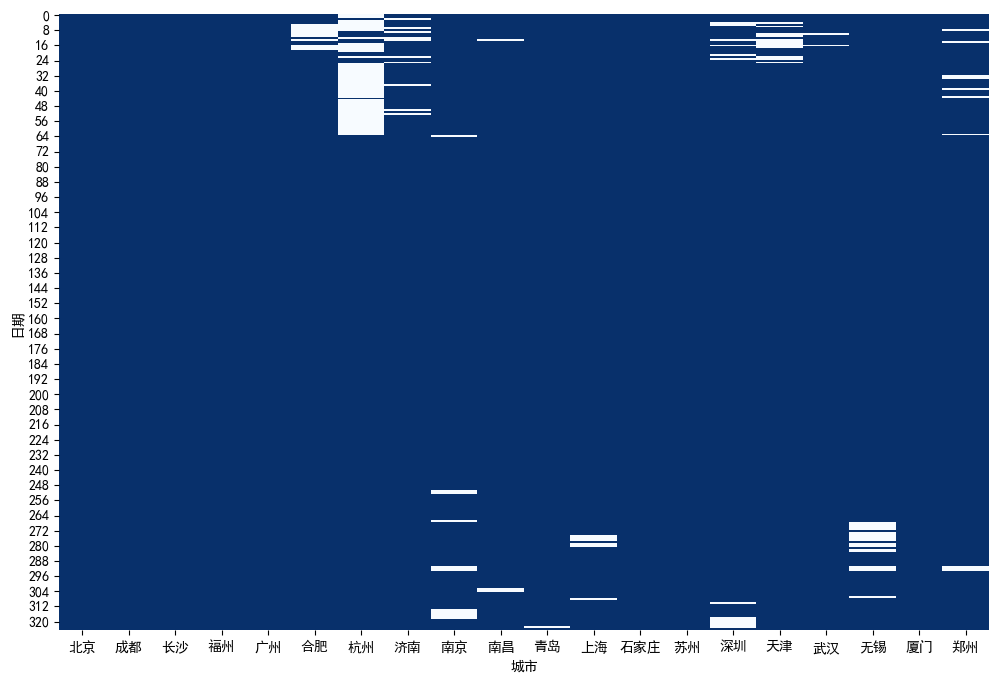

In [63]:
# 绘制异常值分布矩形图，进而判断异常值的填补方式
plt.figure(figsize=(12, 8))
sns.heatmap(df_price.iloc[:, 1:21].isnull(), cbar=False, cmap='Blues_r')
plt.xlabel('城市')
plt.ylabel("日期")

<function matplotlib.pyplot.show(close=None, block=None)>

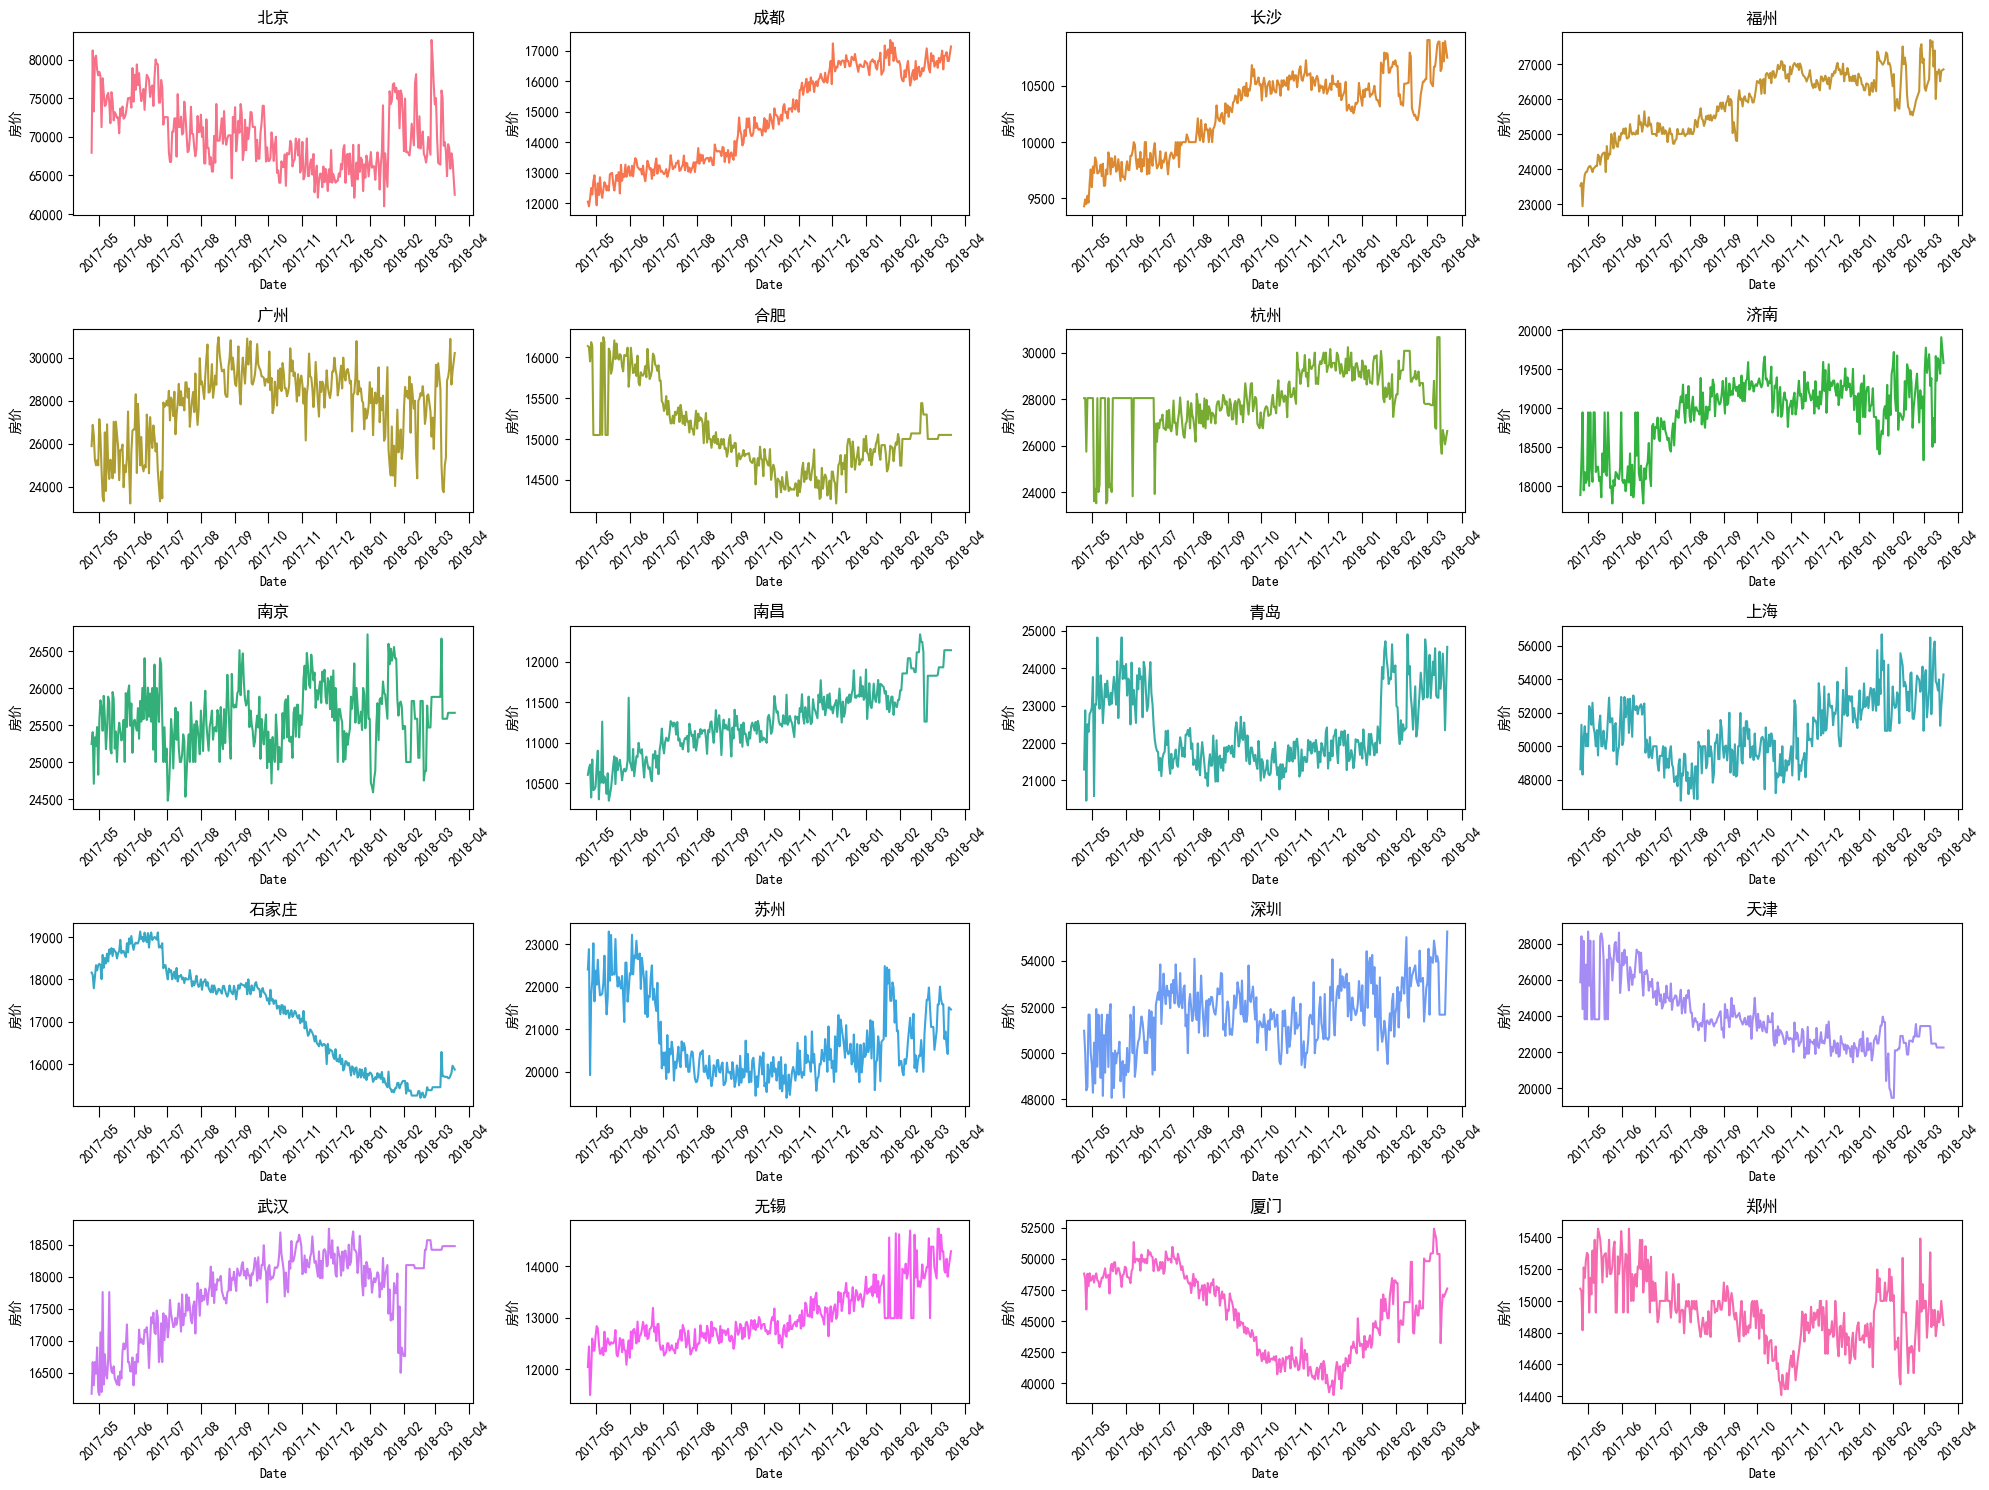

In [64]:
# 发现时间序列数据缺失值分布集中，不应该用平均值进行填补，否则将会导致时间变化趋势被破坏，对比平均值填补前后的时间序列数据
df_mean = df_price.fillna(df_price.mean()).iloc[:, 0:21]

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))

plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换sans-serif字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负数的负号显示问题

# 在每个子图中绘制箱线图
for i, ax in enumerate(axes.flatten()):
    # 此处i表示序号，从0开始到19
    if i < 20:  # 防止多余的子图
        # 进行折线图绘制
        sns.lineplot(x='Date', y=cities[i], data=df_mean, ax=ax, color=sns.color_palette('husl', n_colors=20)[i])
        # 设置标题
        ax.set_title(f'{cities[i]}')
        # 设置y轴标签
        ax.set_ylabel('房价')
        # 设置所有组图x轴旋转45度，大小为8
        ax.tick_params(axis='x', rotation=45, size=8)
    
plt.tight_layout()
plt.show


In [65]:
# 对原始数据进行描述性统计
df_price = pd.read_csv(r'data/二手房房价.csv', encoding='utf-8', parse_dates=['Date'])
df_des = df_price.iloc[:, 1:21].describe()
df_des.head(3)

,北京,成都,长沙,福州,广州,合肥,杭州,济南,南京,南昌,青岛,上海,石家庄,苏州,深圳,天津,武汉,无锡,厦门,郑州
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.00000,325.000000,325.000000,325.000000,325.000000
mean,70173.172308,14757.940000,10264.064615,25875.063077,27805.186154,15092.829231,27145.227692,18905.509231,25638.355385,11265.618462,22348.649231,51081.023077,17147.235385,20741.864615,51689.380000,24020.78000,17750.027692,13107.301538,45841.150769,14947.193846
std,4343.242015,1568.705299,345.090097,930.874066,1727.999947,542.404717,2432.349350,511.558123,565.433138,433.028911,992.305325,2257.773216,1205.659452,921.378850,1594.639194,2057.63241,651.857745,757.235087,3343.212697,241.967120


<Axes: >

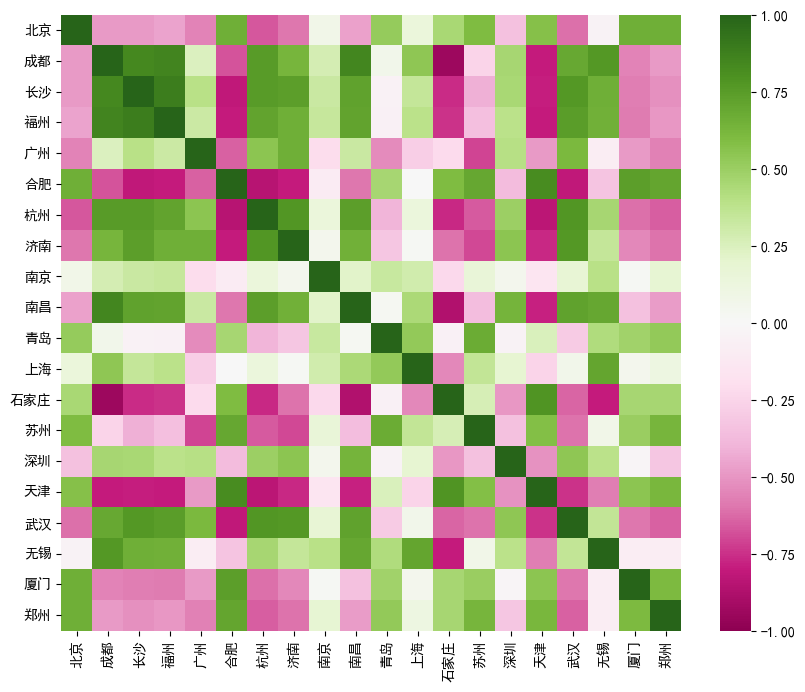

In [66]:
# 对房价数据进行相关性分析
df_corr = df_price.iloc[:, 1:21].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=False, cmap='PiYG', vmin=-1, vmax=1, cbar=True)

<function matplotlib.pyplot.show(close=None, block=None)>

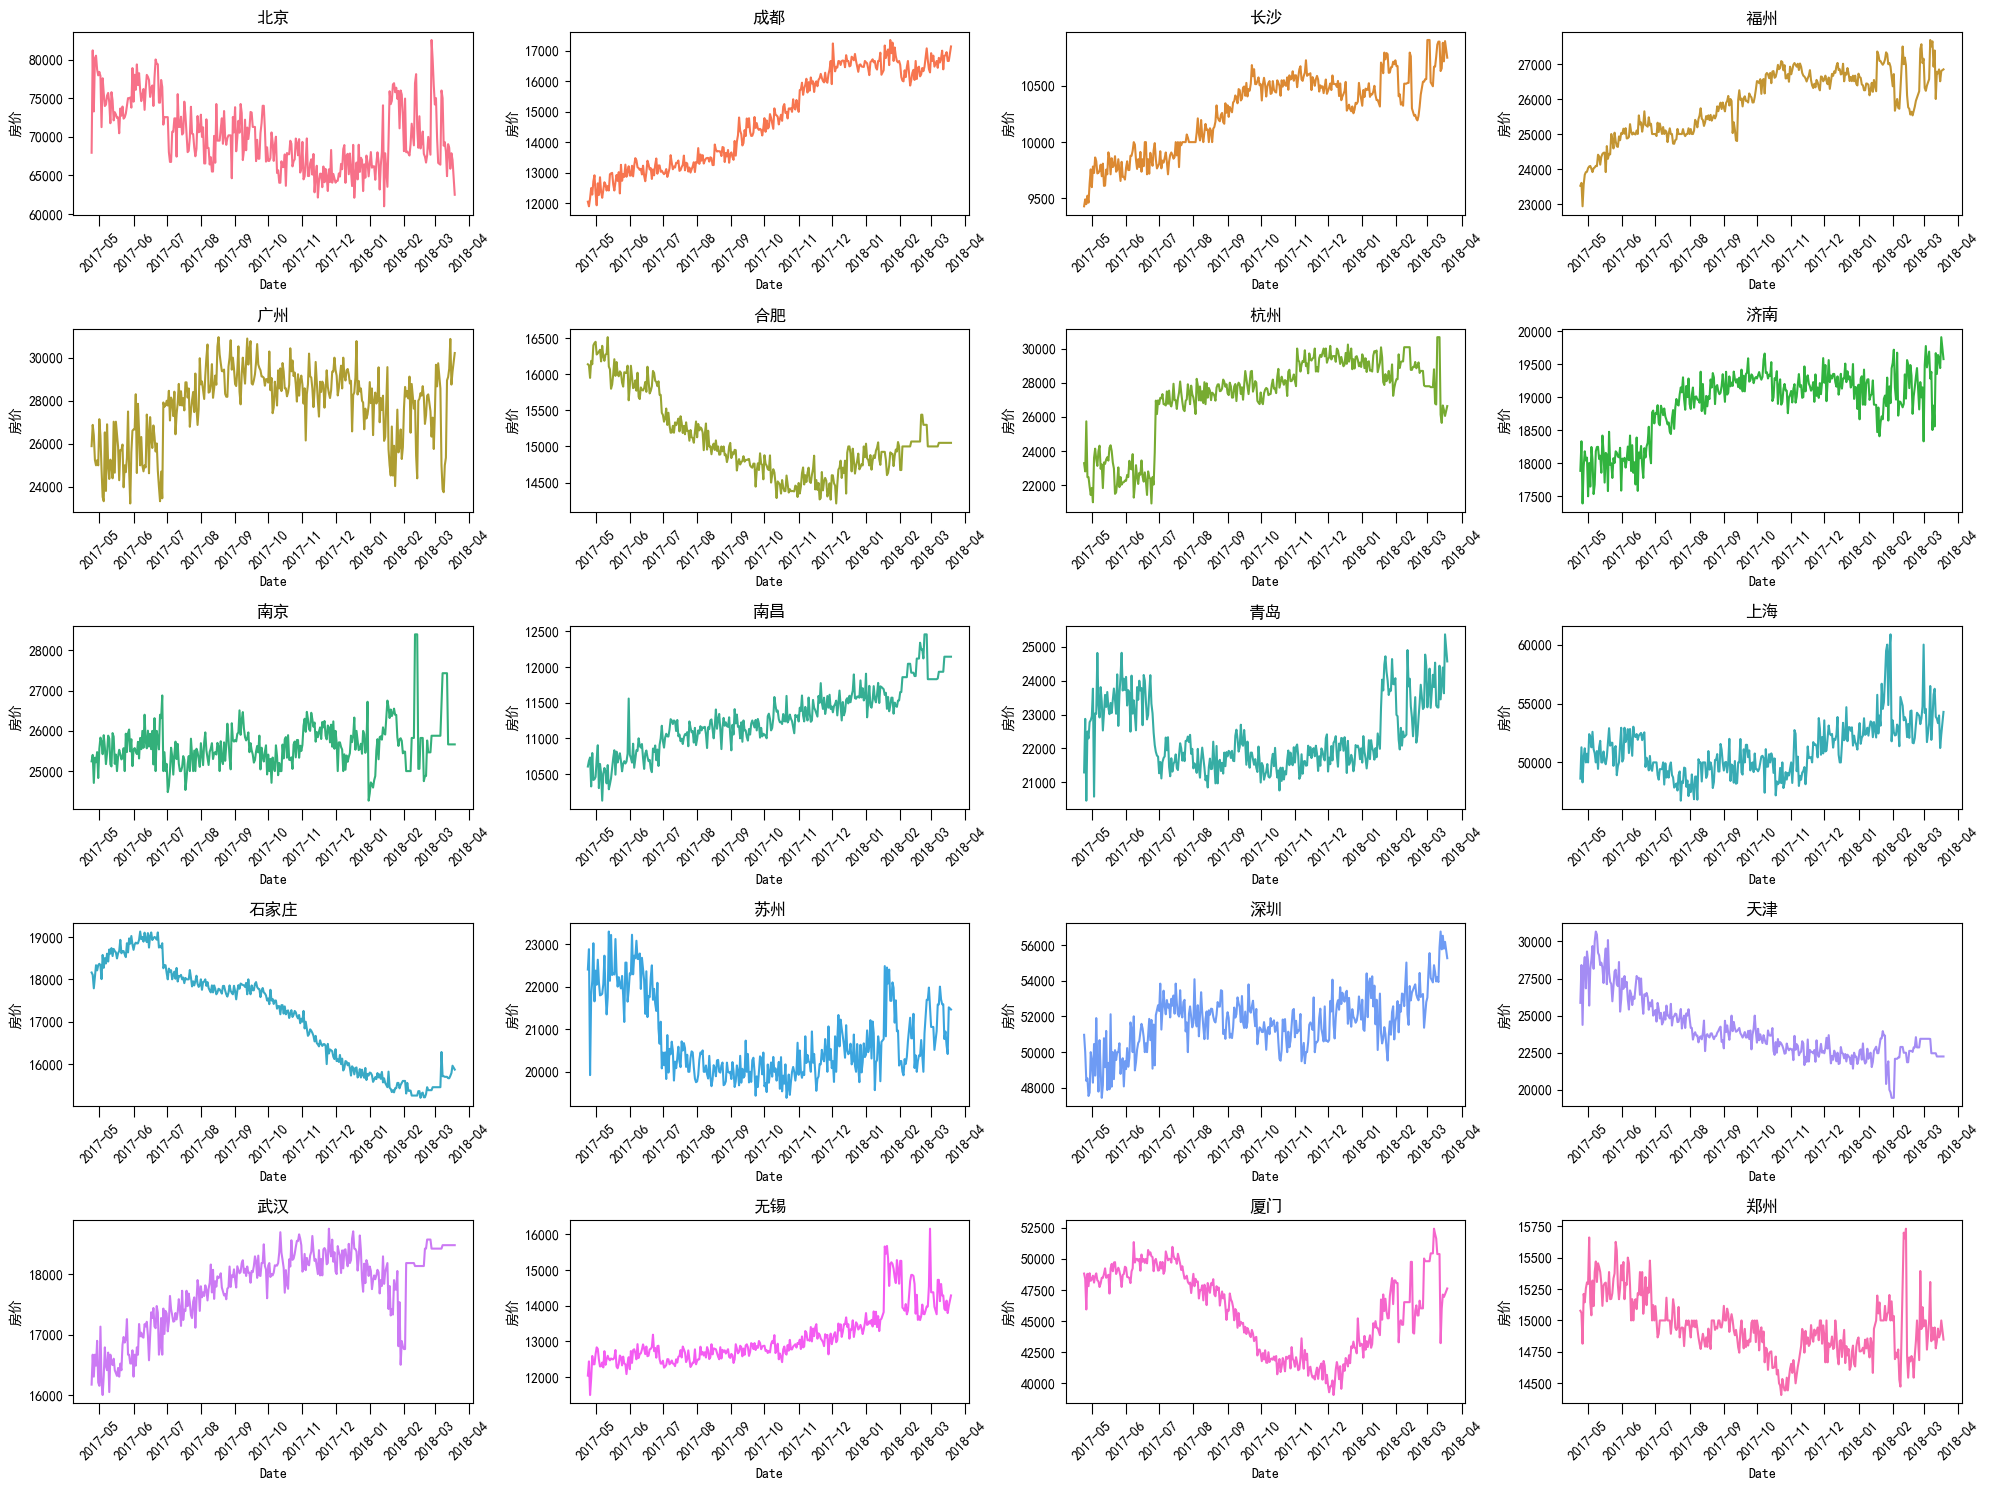

In [52]:
# 进行时间序列分析
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

df_box = pd.read_csv(r'data/二手房房价.csv', encoding='utf-8', parse_dates=['Date']).iloc[:, 0:21]
cities = list(df_box.columns)[1:]


# custom_palette = sns.color_palette("Set1", n_colors=20)

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))

plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换sans-serif字体
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负数的负号显示问题

# 在每个子图中绘制折线图
for i, ax in enumerate(axes.flatten()):
    # 此处i时序号，从0开始到19
    if i < 20:  # 防止多余的子图
        
        sns.lineplot(x='Date', y=cities[i], data=df_box, ax=ax, color=sns.color_palette('husl', n_colors=20)[i])
    
        # 设置标题和标签
        ax.set_title(f'{cities[i]}')
        ax.set_ylabel('房价')
        ax.tick_params(axis='x', rotation=45, size=8)
    



plt.tight_layout()
plt.show


In [36]:
colors = sns.color_palette('husl', n_colors=20)
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]

In [28]:
# 将数据进行汇总保存
import xlsxwriter
with pd.ExcelWriter('data/二手房房价分析.xlsx', engine='xlsxwriter') as writer:
    df_miss.to_excel(writer, sheet_name='缺失值', index=False) # 确定不需要行索引
    df_price.to_excel(writer, sheet_name='平均值填补', index=False)
    df_des.to_excel(writer, sheet_name='描述性统计', index=True)
    df_corr.to_excel(writer, sheet_name='相关性分析', index=True)
    

我现在有一个dataframe，由326行21列构成，第一列代表时间，由2017年5月到2018年4月，剩余二十列是各个城市随时间变化的房价数据。现在希望对这些房价数据进行时间序列分析


In [68]:
# 进行单位根检验，如果p值小于0.05则说明序列是平稳的
from statsmodels.tsa.stattools import adfuller

df_price = pd.read_csv(r'data/二手房房价.csv', encoding='utf-8', parse_dates=['Date'])
cities = list(df_price.columns)[1:21]
ADF_dic = dict()
for city in cities:
    result = adfuller(df_price[city])
    ADF_dic[city] = [result[0], result[1]]

df_ADF = pd.DataFrame(ADF_dic)
df_ADF   


,北京,成都,长沙,福州,广州,合肥,杭州,济南,南京,南昌,青岛,上海,石家庄,苏州,深圳,天津,武汉,无锡,厦门,郑州
0,-3.075612,-0.552279,-1.511529,-2.304632,-2.270994,-2.618097,-1.979037,-1.865101,-6.688650e+00,-1.015931,-2.590159,-2.533232,-0.122934,-2.632721,-1.639132,-2.176704,-2.128896,-1.514842,-1.512058,-2.112687
1,0.028411,0.881405,0.527800,0.170478,0.181494,0.089314,0.295840,0.348653,4.163488e-09,0.747410,0.095048,0.107597,0.947106,0.086421,0.462715,0.214809,0.233055,0.526157,0.527538,0.239444
